In [2]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

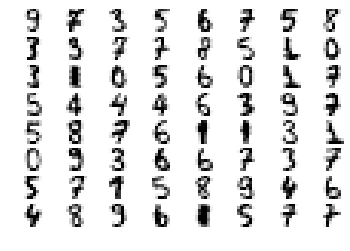

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [6]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 375)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [8]:
winner_list = []
classes = [[8, 9],[4,5,6,7],[2,3,6,7],[1,3,5,7,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:319
number of class2:1298

 ****** Running generation 0 ****** 

Population's average fitness: 0.55300 stdev: 0.21486
Best fitness: 0.80581 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.399
Mean genetic distance 2.908, standard deviation 0.501
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69239 stdev: 0.16242
Best fitness: 0.80767 - size: (2, 14) - species 8 - id 283
Average adjusted fitness: 0.460
Mean genetic distance 2.990, standard deviation 0.476
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.397 sec (5.310 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70544 stdev: 0.15474
Best fitness: 0.81694 - size: (3, 15) - species 1 - id 532
Average adjusted fitness: 0.488
Mean genetic distance 3.041, standard deviation 0.459
Population of 197 members in 33 species
Total extincti

Population of 195 members in 15 species
Total extinctions: 0
Generation time: 8.825 sec (8.795 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.75274 stdev: 0.11766
Best fitness: 0.85962 - size: (7, 29) - species 23 - id 6663
Average adjusted fitness: 0.559
Mean genetic distance 3.207, standard deviation 0.572
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 8.853 sec (8.816 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.73027 stdev: 0.15575
Best fitness: 0.85962 - size: (7, 29) - species 23 - id 6663
Average adjusted fitness: 0.521
Mean genetic distance 3.213, standard deviation 0.586
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.077 sec (8.881 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.74756 stdev: 0.13366
Best fitness: 0.85962 - size: (7, 29) - species 23 - id 6663
Average adjusted fitness: 0.497
Mean genetic distance 

Mean genetic distance 3.267, standard deviation 0.617
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 10.961 sec (10.561 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.75466 stdev: 0.14062
Best fitness: 0.86085 - size: (9, 35) - species 23 - id 11001
Average adjusted fitness: 0.557
Mean genetic distance 3.236, standard deviation 0.624
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.564 sec (10.600 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.74846 stdev: 0.14104
Best fitness: 0.86085 - size: (9, 35) - species 23 - id 11001
Average adjusted fitness: 0.554
Mean genetic distance 3.245, standard deviation 0.616
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 10.778 sec (10.585 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.74061 stdev: 0.16320
Best fitness: 0.86085 - size: (9, 35) - species 23 - 

Mean genetic distance 3.340, standard deviation 0.678
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 12.953 sec (12.250 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.75760 stdev: 0.13067
Best fitness: 0.86580 - size: (18, 44) - species 59 - id 15391
Average adjusted fitness: 0.564
Mean genetic distance 3.293, standard deviation 0.687
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.567 sec (12.421 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.76219 stdev: 0.12565
Best fitness: 0.86580 - size: (18, 44) - species 59 - id 15391
Average adjusted fitness: 0.563
Mean genetic distance 3.290, standard deviation 0.705
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 15.584 sec (12.801 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.75247 stdev: 0.14453
Best fitness: 0.86580 - size: (18, 44) - species 59

Population's average fitness: 0.76154 stdev: 0.12614
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.564
Mean genetic distance 3.240, standard deviation 0.605
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 13.630 sec (13.766 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.76839 stdev: 0.12107
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.569
Mean genetic distance 3.237, standard deviation 0.603
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 14.063 sec (13.797 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.76404 stdev: 0.12069
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.562
Mean genetic distance 3.214, standard deviation 0.611
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.209 sec (13.859 ave

Population's average fitness: 0.76297 stdev: 0.12346
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.543
Mean genetic distance 3.216, standard deviation 0.644
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 13.603 sec (14.488 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.76121 stdev: 0.13055
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.566
Mean genetic distance 3.232, standard deviation 0.601
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 14.514 sec (14.399 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.75616 stdev: 0.12854
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.561
Mean genetic distance 3.225, standard deviation 0.586
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 14.438 sec (14.388 ave

Population's average fitness: 0.76126 stdev: 0.12345
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.561
Mean genetic distance 3.162, standard deviation 0.633
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 14.561 sec (14.551 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.75223 stdev: 0.13708
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.551
Mean genetic distance 3.173, standard deviation 0.635
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 15.397 sec (14.591 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.75939 stdev: 0.12407
Best fitness: 0.89177 - size: (19, 46) - species 59 - id 19288
Average adjusted fitness: 0.542
Mean genetic distance 3.173, standard deviation 0.640
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.015 sec (14.666 ave

Population's average fitness: 0.77563 stdev: 0.11538
Best fitness: 0.89301 - size: (20, 45) - species 59 - id 32140
Average adjusted fitness: 0.569
Mean genetic distance 2.956, standard deviation 0.598
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 14.666 sec (14.434 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.76588 stdev: 0.10842
Best fitness: 0.89301 - size: (20, 45) - species 59 - id 32140
Average adjusted fitness: 0.401
Mean genetic distance 2.905, standard deviation 0.598
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 14.260 sec (14.358 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.75399 stdev: 0.13043
Best fitness: 0.89301 - size: (20, 45) - species 59 - id 32140
Average adjusted fitness: 0.544
Mean genetic distance 2.875, standard deviation 0.592
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 14.316 sec (14.317 ave

Population's average fitness: 0.77709 stdev: 0.09490
Best fitness: 0.89796 - size: (21, 52) - species 59 - id 33556
Average adjusted fitness: 0.395
Mean genetic distance 3.032, standard deviation 0.591
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 17.479 sec (15.697 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.77911 stdev: 0.09062
Best fitness: 0.89796 - size: (21, 52) - species 59 - id 33556
Average adjusted fitness: 0.588
Mean genetic distance 3.067, standard deviation 0.608
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 16.598 sec (15.846 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.75802 stdev: 0.11776
Best fitness: 0.89796 - size: (21, 52) - species 59 - id 33556
Average adjusted fitness: 0.495
Mean genetic distance 3.058, standard deviation 0.613
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 17.306 sec (16.063 avera

Population's average fitness: 0.77359 stdev: 0.10663
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.516
Mean genetic distance 3.042, standard deviation 0.604
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 17.452 sec (16.975 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.76841 stdev: 0.09998
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.557
Mean genetic distance 3.008, standard deviation 0.667
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 17.710 sec (17.116 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.77733 stdev: 0.10403
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.529
Mean genetic distance 3.028, standard deviation 0.651
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 18.985 sec (17.384 ave

Population's average fitness: 0.76210 stdev: 0.11649
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.537
Mean genetic distance 2.982, standard deviation 0.602
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.339 sec (18.533 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.76827 stdev: 0.11666
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.540
Mean genetic distance 2.872, standard deviation 0.580
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 17.602 sec (18.444 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.76413 stdev: 0.11976
Best fitness: 0.89796 - size: (21, 52) - species 104 - id 33556
Average adjusted fitness: 0.533
Mean genetic distance 2.876, standard deviation 0.560
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 16.438 sec (18.306 a

Population's average fitness: 0.77182 stdev: 0.10503
Best fitness: 0.89920 - size: (21, 49) - species 59 - id 46180
Average adjusted fitness: 0.574
Mean genetic distance 2.772, standard deviation 0.528
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.012 sec (17.723 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.76249 stdev: 0.11940
Best fitness: 0.89920 - size: (21, 49) - species 59 - id 46180
Average adjusted fitness: 0.532
Mean genetic distance 2.763, standard deviation 0.523
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.079 sec (17.886 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.76532 stdev: 0.12443
Best fitness: 0.89920 - size: (21, 49) - species 59 - id 46180
Average adjusted fitness: 0.563
Mean genetic distance 2.778, standard deviation 0.539
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 17.581 sec (17.926 ave

Population's average fitness: 0.77452 stdev: 0.09908
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.460
Mean genetic distance 2.701, standard deviation 0.530
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 16.949 sec (17.415 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.77102 stdev: 0.11541
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.541
Mean genetic distance 2.685, standard deviation 0.507
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 16.215 sec (17.267 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.77127 stdev: 0.10264
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.478
Mean genetic distance 2.658, standard deviation 0.508
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.908 sec (17.136 ave

Population's average fitness: 0.76475 stdev: 0.11789
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.524
Mean genetic distance 2.622, standard deviation 0.438
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 19.458 sec (17.596 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.77571 stdev: 0.09704
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.465
Mean genetic distance 2.612, standard deviation 0.435
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 18.153 sec (17.707 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.78090 stdev: 0.09770
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.501
Mean genetic distance 2.642, standard deviation 0.441
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 17.972 sec (17.867 a

Population's average fitness: 0.76628 stdev: 0.13269
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.566
Mean genetic distance 2.696, standard deviation 0.475
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 18.443 sec (18.674 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.78798 stdev: 0.09364
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.391
Mean genetic distance 2.693, standard deviation 0.471
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.442 sec (18.601 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.77643 stdev: 0.09912
Best fitness: 0.89920 - size: (21, 49) - species 121 - id 46180
Average adjusted fitness: 0.416
Mean genetic distance 2.652, standard deviation 0.494
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 20.870 sec (18.709 

Population's average fitness: 0.63067 stdev: 0.09626
Best fitness: 0.78417 - size: (5, 16) - species 32 - id 1151
Average adjusted fitness: 0.333
Mean genetic distance 3.122, standard deviation 0.486
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 7.464 sec (6.699 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64068 stdev: 0.09155
Best fitness: 0.78417 - size: (5, 16) - species 32 - id 1151
Average adjusted fitness: 0.243
Mean genetic distance 3.095, standard deviation 0.475
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 7.456 sec (6.775 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63869 stdev: 0.09460
Best fitness: 0.78417 - size: (5, 16) - species 32 - id 1151
Average adjusted fitness: 0.272
Mean genetic distance 3.094, standard deviation 0.482
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 6.602 sec (6.929 average)

 ****** 

Mean genetic distance 3.304, standard deviation 0.514
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.500 sec (7.801 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65590 stdev: 0.11564
Best fitness: 0.87384 - size: (4, 20) - species 13 - id 3837
Average adjusted fitness: 0.271
Mean genetic distance 3.307, standard deviation 0.519
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 8.092 sec (7.858 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65226 stdev: 0.11536
Best fitness: 0.87384 - size: (4, 20) - species 13 - id 3837
Average adjusted fitness: 0.281
Mean genetic distance 3.303, standard deviation 0.555
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 7.919 sec (7.903 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66055 stdev: 0.10805
Best fitness: 0.87384 - size: (4, 20) - species 13 - id 3837


Mean genetic distance 3.253, standard deviation 0.563
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 8.733 sec (8.780 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.68614 stdev: 0.12486
Best fitness: 0.88930 - size: (10, 27) - species 51 - id 7472
Average adjusted fitness: 0.293
Mean genetic distance 3.271, standard deviation 0.556
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 8.554 sec (8.725 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67708 stdev: 0.13604
Best fitness: 0.88930 - size: (10, 27) - species 51 - id 7472
Average adjusted fitness: 0.438
Mean genetic distance 3.263, standard deviation 0.568
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 8.530 sec (8.722 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.68815 stdev: 0.12224
Best fitness: 0.89177 - size: (10, 27) - species 51 - id 84

Mean genetic distance 3.207, standard deviation 0.642
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.950 sec (9.810 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.70002 stdev: 0.13388
Best fitness: 0.89610 - size: (11, 28) - species 63 - id 11040
Average adjusted fitness: 0.316
Mean genetic distance 3.195, standard deviation 0.622
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.528 sec (9.878 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.69877 stdev: 0.13716
Best fitness: 0.89610 - size: (11, 28) - species 63 - id 11040
Average adjusted fitness: 0.444
Mean genetic distance 3.209, standard deviation 0.620
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.541 sec (9.867 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.68153 stdev: 0.14042
Best fitness: 0.89610 - size: (11, 28) - species 63 - id

Mean genetic distance 3.175, standard deviation 0.555
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 9.745 sec (9.660 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.67568 stdev: 0.14178
Best fitness: 0.89672 - size: (13, 37) - species 58 - id 15797
Average adjusted fitness: 0.303
Mean genetic distance 3.143, standard deviation 0.556
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.593 sec (9.656 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.69234 stdev: 0.13681
Best fitness: 0.89672 - size: (13, 37) - species 58 - id 15797
Average adjusted fitness: 0.314
Mean genetic distance 3.163, standard deviation 0.567
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.188 sec (9.641 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.66495 stdev: 0.14450
Best fitness: 0.89672 - size: (13, 37) - species 58 - 

Mean genetic distance 3.155, standard deviation 0.590
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 9.697 sec (9.481 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.71926 stdev: 0.12354
Best fitness: 0.90662 - size: (14, 40) - species 58 - id 20315
Average adjusted fitness: 0.413
Mean genetic distance 3.161, standard deviation 0.568
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 9.904 sec (9.529 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.71554 stdev: 0.13012
Best fitness: 0.90662 - size: (14, 40) - species 58 - id 20315
Average adjusted fitness: 0.311
Mean genetic distance 3.134, standard deviation 0.588
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 9.953 sec (9.602 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.72180 stdev: 0.12239
Best fitness: 0.90662 - size: (14, 40) - species 58 - 

Population's average fitness: 0.73553 stdev: 0.11865
Best fitness: 0.90662 - size: (14, 40) - species 58 - id 20315
Average adjusted fitness: 0.334
Mean genetic distance 3.039, standard deviation 0.577
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 11.444 sec (12.156 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.72113 stdev: 0.13416
Best fitness: 0.90662 - size: (14, 40) - species 58 - id 20315
Average adjusted fitness: 0.316
Mean genetic distance 3.020, standard deviation 0.578
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 11.616 sec (12.135 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.71896 stdev: 0.13293
Best fitness: 0.90662 - size: (14, 40) - species 58 - id 20315
Average adjusted fitness: 0.359
Mean genetic distance 3.034, standard deviation 0.564
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 11.481 sec (12.153 ave

Population's average fitness: 0.74311 stdev: 0.11291
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.358
Mean genetic distance 2.991, standard deviation 0.517
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 11.872 sec (10.734 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.73972 stdev: 0.11071
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.326
Mean genetic distance 3.007, standard deviation 0.548
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.398 sec (10.695 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.73052 stdev: 0.12304
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.318
Mean genetic distance 3.003, standard deviation 0.541
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 10.940 sec (10.708 ave

Population's average fitness: 0.74102 stdev: 0.12295
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.328
Mean genetic distance 2.924, standard deviation 0.517
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.967 sec (11.996 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.72780 stdev: 0.12610
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.353
Mean genetic distance 2.943, standard deviation 0.480
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 10.730 sec (11.914 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.72049 stdev: 0.13181
Best fitness: 0.91342 - size: (11, 29) - species 81 - id 25487
Average adjusted fitness: 0.407
Mean genetic distance 2.922, standard deviation 0.502
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 12.008 sec (11.876 ave

Population's average fitness: 0.72537 stdev: 0.13122
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.335
Mean genetic distance 3.117, standard deviation 0.611
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 10.970 sec (10.879 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.73058 stdev: 0.12163
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.324
Mean genetic distance 3.082, standard deviation 0.603
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 10.892 sec (10.844 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.72452 stdev: 0.12366
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.336
Mean genetic distance 3.101, standard deviation 0.553
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 10.920 sec (10.806 ave

Population's average fitness: 0.73145 stdev: 0.12491
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.326
Mean genetic distance 3.110, standard deviation 0.570
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.562 sec (10.754 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.74298 stdev: 0.12029
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.338
Mean genetic distance 3.110, standard deviation 0.580
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 10.474 sec (10.670 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.72520 stdev: 0.13701
Best fitness: 0.91960 - size: (13, 34) - species 63 - id 32916
Average adjusted fitness: 0.333
Mean genetic distance 3.115, standard deviation 0.570
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 10.883 sec (10.641 ave

Population's average fitness: 0.73962 stdev: 0.11490
Best fitness: 0.92208 - size: (14, 35) - species 63 - id 43570
Average adjusted fitness: 0.334
Mean genetic distance 3.051, standard deviation 0.576
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.433 sec (10.549 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.75278 stdev: 0.10358
Best fitness: 0.92208 - size: (14, 35) - species 63 - id 43570
Average adjusted fitness: 0.350
Mean genetic distance 3.082, standard deviation 0.574
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.878 sec (10.575 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.74315 stdev: 0.12619
Best fitness: 0.92208 - size: (14, 35) - species 63 - id 43570
Average adjusted fitness: 0.358
Mean genetic distance 3.081, standard deviation 0.559
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.664 sec (10.556 ave

Population's average fitness: 0.72066 stdev: 0.13344
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.319
Mean genetic distance 2.982, standard deviation 0.570
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 11.208 sec (10.880 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.74273 stdev: 0.12139
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.287
Mean genetic distance 3.028, standard deviation 0.594
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.088 sec (10.963 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.73195 stdev: 0.12633
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.324
Mean genetic distance 3.061, standard deviation 0.591
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 10.980 sec (11.040 

Mean genetic distance 2.859, standard deviation 0.527
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 11.560 sec (12.107 average)

 ****** Running generation 320 ****** 

Population's average fitness: 0.71423 stdev: 0.13324
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.324
Mean genetic distance 2.890, standard deviation 0.548
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 11.382 sec (12.013 average)

 ****** Running generation 321 ****** 

Population's average fitness: 0.73710 stdev: 0.12527
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.339
Mean genetic distance 2.899, standard deviation 0.508
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 11.827 sec (11.988 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.71309 stdev: 0.13435
Best fitness: 0.92208 - size: (14, 35) - speci

Population's average fitness: 0.70756 stdev: 0.13347
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.291
Mean genetic distance 3.101, standard deviation 0.579
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.216 sec (10.710 average)

 ****** Running generation 344 ****** 

Population's average fitness: 0.71742 stdev: 0.13449
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.302
Mean genetic distance 3.062, standard deviation 0.543
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 10.347 sec (10.601 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.72283 stdev: 0.12275
Best fitness: 0.92208 - size: (14, 35) - species 146 - id 43570
Average adjusted fitness: 0.311
Mean genetic distance 3.057, standard deviation 0.551
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.685 sec (10.587 

Mean genetic distance 3.065, standard deviation 0.505
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.169 sec (11.724 average)

 ****** Running generation 367 ****** 

Population's average fitness: 0.72912 stdev: 0.12151
Best fitness: 0.92455 - size: (16, 40) - species 146 - id 59706
Average adjusted fitness: 0.323
Mean genetic distance 3.077, standard deviation 0.501
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 11.299 sec (11.788 average)

 ****** Running generation 368 ****** 

Population's average fitness: 0.71346 stdev: 0.12894
Best fitness: 0.92455 - size: (16, 40) - species 176 - id 59706
Average adjusted fitness: 0.321
Mean genetic distance 3.040, standard deviation 0.518
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 12.131 sec (11.921 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.71830 stdev: 0.12988
Best fitness: 0.92455 - size: (16, 40) - speci

Mean genetic distance 3.142, standard deviation 0.486
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 7.256 sec (6.807 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64511 stdev: 0.09686
Best fitness: 0.80767 - size: (5, 21) - species 10 - id 1158
Average adjusted fitness: 0.324
Mean genetic distance 3.150, standard deviation 0.488
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.240 sec (6.912 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65108 stdev: 0.09401
Best fitness: 0.80767 - size: (5, 21) - species 10 - id 1158
Average adjusted fitness: 0.329
Mean genetic distance 3.174, standard deviation 0.492
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.030 sec (6.955 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63488 stdev: 0.11205
Best fitness: 0.80767 - size: (5, 21) - species 10 - id 1158


Population of 194 members in 27 species
Total extinctions: 0
Generation time: 7.984 sec (8.189 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.66418 stdev: 0.10147
Best fitness: 0.81756 - size: (2, 16) - species 43 - id 5413
Average adjusted fitness: 0.289
Mean genetic distance 3.147, standard deviation 0.541
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.768 sec (8.220 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66918 stdev: 0.09779
Best fitness: 0.81756 - size: (2, 16) - species 43 - id 5413
Average adjusted fitness: 0.313
Mean genetic distance 3.133, standard deviation 0.554
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 9.489 sec (8.440 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.64991 stdev: 0.10915
Best fitness: 0.81756 - size: (2, 16) - species 43 - id 5413
Average adjusted fitness: 0.336
Mean genetic distance 

Mean genetic distance 3.092, standard deviation 0.593
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 9.029 sec (9.991 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.63974 stdev: 0.11378
Best fitness: 0.82004 - size: (2, 16) - species 43 - id 8257
Average adjusted fitness: 0.325
Mean genetic distance 3.085, standard deviation 0.600
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 9.154 sec (9.987 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65041 stdev: 0.11209
Best fitness: 0.82004 - size: (4, 19) - species 60 - id 8264
Average adjusted fitness: 0.339
Mean genetic distance 3.103, standard deviation 0.578
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 10.170 sec (9.572 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.64801 stdev: 0.11777
Best fitness: 0.82004 - size: (4, 19) - species 60 - id 8264

Mean genetic distance 3.038, standard deviation 0.566
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.821 sec (9.035 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.66332 stdev: 0.10487
Best fitness: 0.82498 - size: (3, 18) - species 43 - id 12295
Average adjusted fitness: 0.266
Mean genetic distance 3.076, standard deviation 0.570
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 8.660 sec (8.970 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.65954 stdev: 0.11476
Best fitness: 0.83179 - size: (5, 21) - species 43 - id 13272
Average adjusted fitness: 0.397
Mean genetic distance 3.039, standard deviation 0.568
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 8.683 sec (8.992 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.65890 stdev: 0.11150
Best fitness: 0.83179 - size: (5, 21) - species 43 - id 132

Mean genetic distance 3.023, standard deviation 0.528
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.921 sec (9.140 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.67570 stdev: 0.10531
Best fitness: 0.83241 - size: (8, 28) - species 78 - id 16357
Average adjusted fitness: 0.314
Mean genetic distance 3.017, standard deviation 0.512
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.692 sec (9.238 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.68218 stdev: 0.10586
Best fitness: 0.83241 - size: (8, 28) - species 78 - id 16357
Average adjusted fitness: 0.272
Mean genetic distance 2.955, standard deviation 0.518
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.044 sec (9.462 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.66185 stdev: 0.11340
Best fitness: 0.83241 - size: (8, 28) - species 78 - id

Population's average fitness: 0.66805 stdev: 0.11239
Best fitness: 0.83550 - size: (12, 30) - species 86 - id 18918
Average adjusted fitness: 0.261
Mean genetic distance 3.097, standard deviation 0.529
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.617 sec (11.840 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.67965 stdev: 0.10616
Best fitness: 0.83550 - size: (12, 30) - species 86 - id 18918
Average adjusted fitness: 0.312
Mean genetic distance 3.116, standard deviation 0.525
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.729 sec (11.749 average)

 ****** Running generation 137 ****** 

Population's average fitness: 0.68022 stdev: 0.10896
Best fitness: 0.83550 - size: (12, 30) - species 86 - id 18918
Average adjusted fitness: 0.406
Mean genetic distance 3.115, standard deviation 0.525
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 10.580 sec (11.604 ave

Population's average fitness: 0.68199 stdev: 0.11228
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.346
Mean genetic distance 3.092, standard deviation 0.538
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.814 sec (12.150 average)

 ****** Running generation 160 ****** 

Population's average fitness: 0.66068 stdev: 0.12266
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.303
Mean genetic distance 3.106, standard deviation 0.564
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.789 sec (11.980 average)

 ****** Running generation 161 ****** 

Population's average fitness: 0.67950 stdev: 0.10987
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.424
Mean genetic distance 3.121, standard deviation 0.556
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 11.729 sec (11.980 averag

Population's average fitness: 0.68575 stdev: 0.11216
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.283
Mean genetic distance 2.841, standard deviation 0.505
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.998 sec (11.574 average)

 ****** Running generation 184 ****** 

Population's average fitness: 0.68218 stdev: 0.11791
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.385
Mean genetic distance 2.856, standard deviation 0.504
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.896 sec (11.490 average)

 ****** Running generation 185 ****** 

Population's average fitness: 0.70623 stdev: 0.10402
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.333
Mean genetic distance 2.870, standard deviation 0.508
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 11.155 sec (11.394 averag

Population's average fitness: 0.69709 stdev: 0.11521
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.413
Mean genetic distance 2.959, standard deviation 0.510
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.165 sec (11.792 average)

 ****** Running generation 208 ****** 

Population's average fitness: 0.69062 stdev: 0.10887
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.283
Mean genetic distance 2.942, standard deviation 0.493
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.059 sec (11.686 average)

 ****** Running generation 209 ****** 

Population's average fitness: 0.68419 stdev: 0.11975
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.392
Mean genetic distance 2.939, standard deviation 0.506
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 11.063 sec (11.579 averag

Population's average fitness: 0.68895 stdev: 0.11174
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.299
Mean genetic distance 3.016, standard deviation 0.541
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 11.539 sec (11.501 average)

 ****** Running generation 232 ****** 

Population's average fitness: 0.68564 stdev: 0.11536
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.425
Mean genetic distance 3.014, standard deviation 0.516
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.956 sec (11.541 average)

 ****** Running generation 233 ****** 

Population's average fitness: 0.68424 stdev: 0.12508
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.333
Mean genetic distance 3.004, standard deviation 0.520
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 11.626 sec (11.586 averag

Population's average fitness: 0.69303 stdev: 0.10933
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.291
Mean genetic distance 2.942, standard deviation 0.563
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 11.527 sec (11.329 average)

 ****** Running generation 256 ****** 

Population's average fitness: 0.66998 stdev: 0.12551
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.278
Mean genetic distance 2.940, standard deviation 0.548
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 11.320 sec (11.346 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.67378 stdev: 0.12564
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.329
Mean genetic distance 2.928, standard deviation 0.540
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 11.617 sec (11.342 averag

Population's average fitness: 0.67341 stdev: 0.11461
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.284
Mean genetic distance 2.897, standard deviation 0.539
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.067 sec (12.492 average)

 ****** Running generation 280 ****** 

Population's average fitness: 0.66837 stdev: 0.12384
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.308
Mean genetic distance 2.892, standard deviation 0.546
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.004 sec (12.473 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.65720 stdev: 0.12442
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.309
Mean genetic distance 2.949, standard deviation 0.524
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.337 sec (12.493 averag

Population's average fitness: 0.68981 stdev: 0.11202
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.346
Mean genetic distance 2.933, standard deviation 0.501
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 13.335 sec (12.987 average)

 ****** Running generation 304 ****** 

Population's average fitness: 0.68727 stdev: 0.12162
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.422
Mean genetic distance 2.923, standard deviation 0.508
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.244 sec (13.046 average)

 ****** Running generation 305 ****** 

Population's average fitness: 0.68135 stdev: 0.11972
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.304
Mean genetic distance 2.902, standard deviation 0.491
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 13.043 sec (13.058 averag

Population's average fitness: 0.68670 stdev: 0.11013
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.295
Mean genetic distance 2.896, standard deviation 0.504
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.835 sec (13.325 average)

 ****** Running generation 328 ****** 

Population's average fitness: 0.69168 stdev: 0.10715
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.323
Mean genetic distance 2.925, standard deviation 0.522
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 12.948 sec (13.247 average)

 ****** Running generation 329 ****** 

Population's average fitness: 0.67981 stdev: 0.10875
Best fitness: 0.84663 - size: (9, 30) - species 83 - id 23065
Average adjusted fitness: 0.288
Mean genetic distance 2.917, standard deviation 0.526
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.191 sec (13.148 averag

Population's average fitness: 0.68392 stdev: 0.12334
Best fitness: 0.84848 - size: (17, 49) - species 148 - id 57413
Average adjusted fitness: 0.312
Mean genetic distance 3.072, standard deviation 0.559
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 12.734 sec (12.894 average)

 ****** Running generation 352 ****** 

Population's average fitness: 0.67599 stdev: 0.12335
Best fitness: 0.84848 - size: (17, 49) - species 148 - id 57413
Average adjusted fitness: 0.350
Mean genetic distance 3.095, standard deviation 0.574
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 13.749 sec (12.885 average)

 ****** Running generation 353 ****** 

Population's average fitness: 0.68137 stdev: 0.11256
Best fitness: 0.84848 - size: (17, 49) - species 148 - id 57413
Average adjusted fitness: 0.316
Mean genetic distance 3.081, standard deviation 0.579
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 12.552 sec (12.838 

Mean genetic distance 3.199, standard deviation 0.604
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 12.393 sec (12.732 average)
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50798 stdev: 0.07097
Best fitness: 0.72109 - size: (2, 13) - species 2 - id 161
Average adjusted fitness: 0.212
Mean genetic distance 2.856, standard deviation 0.460
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.273 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54400 stdev: 0.07771
Best fitness: 0.80829 - size: (3, 14) - species 7 - id 251
Average adjusted fitness: 0.263
Mean genetic distance 2.928, standard deviation 0.467
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.750 sec (5.512 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56573 stdev: 0.08745
Best fitness: 0.80829 - size: (3, 14) - 

Mean genetic distance 3.166, standard deviation 0.489
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.846 sec (7.450 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65512 stdev: 0.11292
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061
Average adjusted fitness: 0.243
Mean genetic distance 3.181, standard deviation 0.491
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.807 sec (7.488 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66910 stdev: 0.11617
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061
Average adjusted fitness: 0.441
Mean genetic distance 3.195, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.059 sec (7.562 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66122 stdev: 0.11347
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061


Total extinctions: 0
Generation time: 8.796 sec (8.429 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.65905 stdev: 0.12605
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061
Average adjusted fitness: 0.333
Mean genetic distance 3.218, standard deviation 0.541
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.925 sec (8.507 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66595 stdev: 0.11878
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061
Average adjusted fitness: 0.281
Mean genetic distance 3.222, standard deviation 0.553
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.926 sec (8.597 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66697 stdev: 0.12377
Best fitness: 0.83797 - size: (5, 22) - species 31 - id 3061
Average adjusted fitness: 0.331
Mean genetic distance 3.228, standard deviation 0.553
Populati

Population's average fitness: 0.66904 stdev: 0.13041
Best fitness: 0.85281 - size: (7, 26) - species 31 - id 9931
Average adjusted fitness: 0.427
Mean genetic distance 3.091, standard deviation 0.611
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.330 sec (9.360 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66683 stdev: 0.13226
Best fitness: 0.86024 - size: (9, 31) - species 31 - id 11123
Average adjusted fitness: 0.464
Mean genetic distance 3.082, standard deviation 0.604
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 9.334 sec (9.375 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66540 stdev: 0.13429
Best fitness: 0.86024 - size: (9, 31) - species 31 - id 11123
Average adjusted fitness: 0.448
Mean genetic distance 3.067, standard deviation 0.588
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 9.401 sec (9.397 average)

 ****

Population's average fitness: 0.67878 stdev: 0.12615
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.429
Mean genetic distance 3.283, standard deviation 0.637
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.780 sec (11.754 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.67283 stdev: 0.13394
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.423
Mean genetic distance 3.272, standard deviation 0.651
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.299 sec (11.957 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67163 stdev: 0.13023
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.456
Mean genetic distance 3.280, standard deviation 0.624
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 11.299 sec (12.031 avera

Population's average fitness: 0.68734 stdev: 0.13022
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.452
Mean genetic distance 3.183, standard deviation 0.617
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 14.433 sec (13.031 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.68164 stdev: 0.12761
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.221
Mean genetic distance 3.179, standard deviation 0.620
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.963 sec (13.152 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68464 stdev: 0.12732
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.358
Mean genetic distance 3.172, standard deviation 0.623
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.610 sec (13.063 ave

Population's average fitness: 0.67374 stdev: 0.12446
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.440
Mean genetic distance 3.042, standard deviation 0.554
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.149 sec (12.863 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.69043 stdev: 0.11901
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.308
Mean genetic distance 3.031, standard deviation 0.548
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 15.237 sec (13.156 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67796 stdev: 0.12583
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.320
Mean genetic distance 3.026, standard deviation 0.545
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 14.701 sec (13.395 ave

Population's average fitness: 0.66358 stdev: 0.12376
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.305
Mean genetic distance 2.968, standard deviation 0.518
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 14.487 sec (13.240 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.65746 stdev: 0.12542
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.208
Mean genetic distance 2.968, standard deviation 0.570
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 14.049 sec (13.525 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.66751 stdev: 0.12340
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.361
Mean genetic distance 2.971, standard deviation 0.560
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 15.740 sec (13.739 aver

Population's average fitness: 0.67380 stdev: 0.12075
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.239
Mean genetic distance 3.053, standard deviation 0.526
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.226 sec (13.512 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.67226 stdev: 0.11874
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.272
Mean genetic distance 3.032, standard deviation 0.528
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.551 sec (13.528 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.68143 stdev: 0.12042
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.273
Mean genetic distance 3.007, standard deviation 0.537
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.472 sec (13.481 ave

Population's average fitness: 0.64023 stdev: 0.11900
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.248
Mean genetic distance 3.015, standard deviation 0.507
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 15.510 sec (13.409 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.63882 stdev: 0.11752
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.323
Mean genetic distance 2.993, standard deviation 0.520
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.989 sec (13.646 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.63775 stdev: 0.11416
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.246
Mean genetic distance 3.002, standard deviation 0.540
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.341 sec (13.784 ave

Population's average fitness: 0.67043 stdev: 0.13210
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.385
Mean genetic distance 2.957, standard deviation 0.549
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 19.409 sec (16.538 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.65845 stdev: 0.13112
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.246
Mean genetic distance 2.968, standard deviation 0.561
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.359 sec (16.343 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.66835 stdev: 0.12707
Best fitness: 0.86827 - size: (10, 34) - species 31 - id 13677
Average adjusted fitness: 0.330
Mean genetic distance 2.960, standard deviation 0.562
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 14.501 sec (16.066 ave

Population's average fitness: 0.68391 stdev: 0.12449
Best fitness: 0.86827 - size: (10, 34) - species 120 - id 13677
Average adjusted fitness: 0.291
Mean genetic distance 2.990, standard deviation 0.489
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 13.912 sec (13.789 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.67474 stdev: 0.13406
Best fitness: 0.86827 - size: (10, 34) - species 120 - id 13677
Average adjusted fitness: 0.296
Mean genetic distance 2.981, standard deviation 0.498
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.137 sec (13.859 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.68414 stdev: 0.13612
Best fitness: 0.86827 - size: (10, 34) - species 120 - id 13677
Average adjusted fitness: 0.368
Mean genetic distance 2.992, standard deviation 0.492
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.145 sec (13.833 

Mean genetic distance 2.991, standard deviation 0.547
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 11.785 sec (12.212 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.68536 stdev: 0.13260
Best fitness: 0.87755 - size: (16, 44) - species 118 - id 47991
Average adjusted fitness: 0.274
Mean genetic distance 2.983, standard deviation 0.550
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.951 sec (12.166 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.68483 stdev: 0.13300
Best fitness: 0.87755 - size: (16, 44) - species 118 - id 47991
Average adjusted fitness: 0.342
Mean genetic distance 2.984, standard deviation 0.534
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 12.863 sec (12.168 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.69229 stdev: 0.12803
Best fitness: 0.87755 - size: (16, 44) - speci

Population's average fitness: 0.66499 stdev: 0.12303
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.272
Mean genetic distance 2.903, standard deviation 0.523
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 15.936 sec (13.035 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.66628 stdev: 0.12215
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.208
Mean genetic distance 2.885, standard deviation 0.526
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 13.489 sec (13.161 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.67109 stdev: 0.12124
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.351
Mean genetic distance 2.924, standard deviation 0.529
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.236 sec (13.295 

Mean genetic distance 2.899, standard deviation 0.541
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 13.173 sec (13.099 average)

 ****** Running generation 335 ****** 

Population's average fitness: 0.68689 stdev: 0.12126
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.329
Mean genetic distance 2.855, standard deviation 0.570
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 12.941 sec (13.098 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.67309 stdev: 0.12860
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.377
Mean genetic distance 2.846, standard deviation 0.569
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 15.250 sec (13.360 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.67371 stdev: 0.12859
Best fitness: 0.88188 - size: (19, 50) - species

Population's average fitness: 0.67947 stdev: 0.12784
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.292
Mean genetic distance 2.937, standard deviation 0.533
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 17.283 sec (16.639 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.68470 stdev: 0.12954
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.429
Mean genetic distance 2.978, standard deviation 0.528
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 14.712 sec (16.545 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.69165 stdev: 0.12553
Best fitness: 0.88188 - size: (19, 50) - species 137 - id 51769
Average adjusted fitness: 0.238
Mean genetic distance 2.972, standard deviation 0.550
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.700 sec (16.447 

In [3]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [13]:
pred = []
real = []
for i in range(4):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:35/145:class2
Accuracy: 0.9111111111111111
class1:75/105:class2
Accuracy: 0.9166666666666666
class1:72/108:class2
Accuracy: 0.8555555555555555
class1:92/88:class2
Accuracy: 0.8


In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [15]:
number_codes = [[0,0,0,0],
[0,0,0,1],
[0,0,1,0],
[0,0,1,1],
[0,1,0,0],
[0,1,0,1],
[0,1,1,0],
[0,1,1,1],
[1,0,0,0],
[1,0,0,1]]

In [16]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [20]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [21]:
np.sum(list_P == digits.target[1617:])/180

0.6

In [22]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [27]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16 13  0  0  0  0  0  1  3  0]
 [ 0  3  0  6  0  2  0  0  3  2]
 [ 0  1 14  1  0  0  0  2  1  0]
 [ 0  1  3  7  0  0  0  3  0  1]
 [ 0  0  0  0 14  1 10  1  1  0]
 [ 0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  8  2  0  0]
 [ 0  0  0  2  0  1  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  8  1]
 [ 0  1  0  2  2  0  0  0  1 14]]


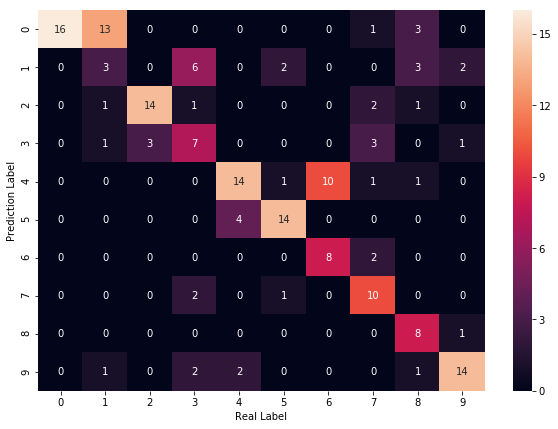

In [24]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [25]:
plt.hist(list_P)

(array([33., 16., 19., 15., 27., 18., 10., 13.,  9., 20.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [26]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [27]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:11 index:[5] real:5
#1 min_error:11 index:[2] real:2
#2 min_error:11 index:[1] real:8
#3 min_error:11 index:[0] real:0
#4 min_error:11 index:[0] real:1
#5 min_error:11 index:[2] real:7
#6 min_error:11 index:[4] real:6
#7 min_error:11 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:11 index:[1] real:1
#10 min_error:11 index:[6] real:7
#11 min_error:11 index:[9] real:4
#12 min_error:11 index:[6] real:6
#13 min_error:11 index:[3] real:3
#14 min_error:11 index:[1] real:1
#15 min_error:11 index:[1] real:3
#16 min_error:12 index:[5 9] real:9
#17 min_error:11 index:[0] real:1
#18 min_error:11 index:[0] real:7
#19 min_error:11 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:11 index:[4] real:4
#22 min_error:11 index:[3] real:3
#23 min_error:11 index:[3] real:1
#24 min_error:11 index:[4] real:4
#25 min_error:11 index:[0] real:0
#26 min_error:11 index:[1] real:5
#27 min_error:11 index:[1] real:3
#28 min_error:11 index:[4] real:6
#29 min_error:11 index